## Univariate Timeseries Classification

In [8]:
import os
import pandas as pd

filename = os.path.join("data", "arrowhead", "ArrowHead.txt")
data = pd.read_csv(filename, sep='  ', header=None, engine="python")

X_train_orig = data.iloc[:, 1:]
y_train_orig = pd.get_dummies(data.iloc[:, 0].astype('int'))

X_train_orig.shape

(36, 251)

In [9]:
from pyreal.transformers import DimensionAdder

formatter = DimensionAdder()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [23]:
model.fit(X_train_orig, y_train_orig)

model.score(X_train_orig, y_train_orig)

0.8055555555555556

In [29]:
import pyreal.explainers.time_series.saliency.univariate_occlusion_saliency as oi
import time

explainer = oi.UnivariateOcclusionSaliency(model, X_train_orig, width=5, k=0, classes=[1, 2, 3])
explainer.fit()

start = time.time()
explanation1 = explainer.produce(X_train_orig.iloc[0])
explanation2 = explainer.produce(X_train_orig.iloc[2])

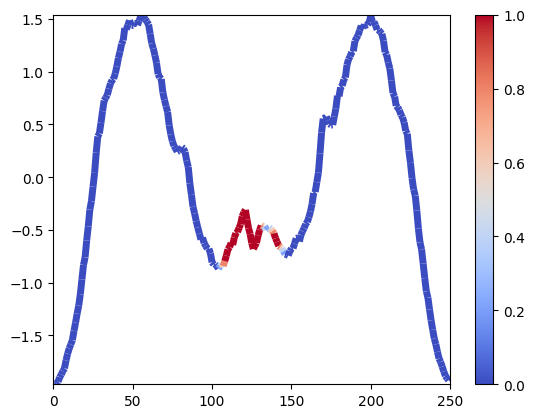

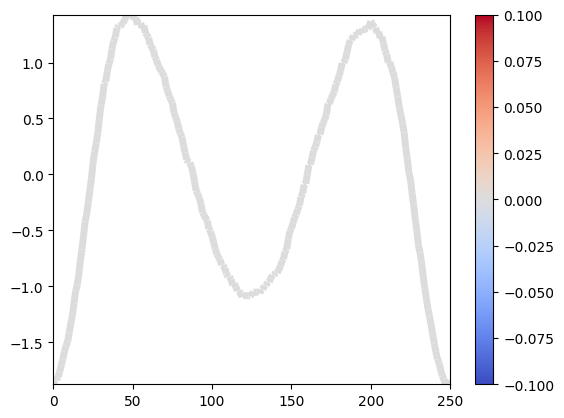

In [30]:
import pyreal.visualize as vis

vis.plot_timeseries_saliency(X_train_orig.iloc[0], explanation1.get().iloc[0, :])
vis.plot_timeseries_saliency(X_train_orig.iloc[2], explanation2.get().iloc[0, :])